In [1]:
import pandas as pd
import sys
import os
import numpy as np
import pylab as pl
import statsmodels.formula.api as smf
import scipy.stats as stats
import numpy.ma as ma
import statsmodels.api as sm
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

allmales={}
allfemales={}

allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls',header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls',header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls',header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls',header=9)

In [3]:
print allmales['all'].columns
print allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [4]:
#removing nan entries for all males and allfemales
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)
            
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
#i ran it and it took incredibly long to run, that is why i put a hashtag in front of it
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix (allmales['all'], s=300, figsize=(16, 16), diagonal='kde')
#scatter_matrix (allfemales['all'], s=300, figsize=(16, 16), diagonal='kde')


In [6]:
#i thought i might need this eventually. i made an array of all the median incomes for all races
#for some reason when i tried to plot a scateter it wasnt working?
median_income_all_F = []
median_income_all_F = [allfemales['all']['Median income'][1], allfemales['white']['Median income'][1], allfemales['black']['Median income'][1], allfemales['hispanic']['Median income'][1],allfemales['asian']['Median income'][1]]
median_income_all_M = []
median_income_all_M = [allmales['all']['Median income'][1], allmales['white']['Median income'][1], allmales['black']['Median income'][1], allmales['hispanic']['Median income'][1],allmales['asian']['Median income'][1]]

In [7]:
# did the same things as above 
WMI = []
for i in allfemales:
    WMI.append(allfemales[i]['Median income'][1])

MMI = []
for i in allmales:
    MMI.append(allmales[i]['Median income'][1])

In [8]:
print WMI, MMI

[17762.0, 22063.0, 20044.0, 23780.0, 24840.0] [25411.0, 35228.0, 24855.0, 40122.0, 40153.0]


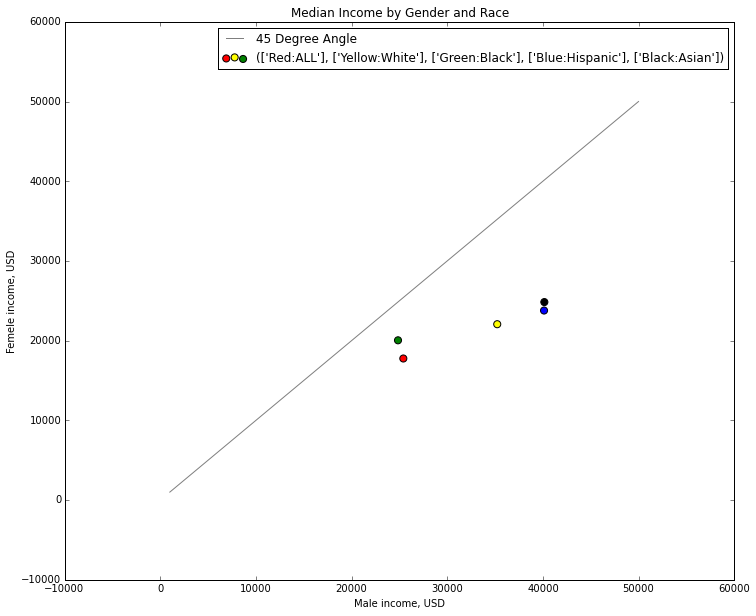

In [50]:
#plot median income for males and females in a scatter plot 
#a 45 degree line represents equal pay
#you can see its skewed towards the males

fig = pl.figure(figsize=(12,10))
labels  = (['Red:' 'ALL'], ['Yellow:' 'White'], ['Green:' 'Black'], ['Blue:' 'Hispanic'], ['Black:' 'Asian'])
y  = ['red','yellow','green','blue','black']
pl.scatter(MMI, WMI, s=50, c=y, label=labels)
plot([1000,50000], [1000,50000], color='black', alpha=.5, label= "45 Degree Angle")

pl.title('Median Income by Gender and Race')
pl.xlabel('Male income, USD')
pl.ylabel('Femele income, USD')
pl.legend()

In [10]:
#created a MMI and WMI into dataframes to use smf.ols function
data = pd.DataFrame({'x': MMI, 'y':WMI})
model1 = smf.ols(formula = 'y ~ x', data=data, missing = 'drop').fit()
print model1.summary()
print model1.params[0]
print model1.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Sun, 18 Oct 2015   Prob (F-statistic):             0.0176
Time:                        09:53:05   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9989.8444   2508.397      3.983      0.0

//anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


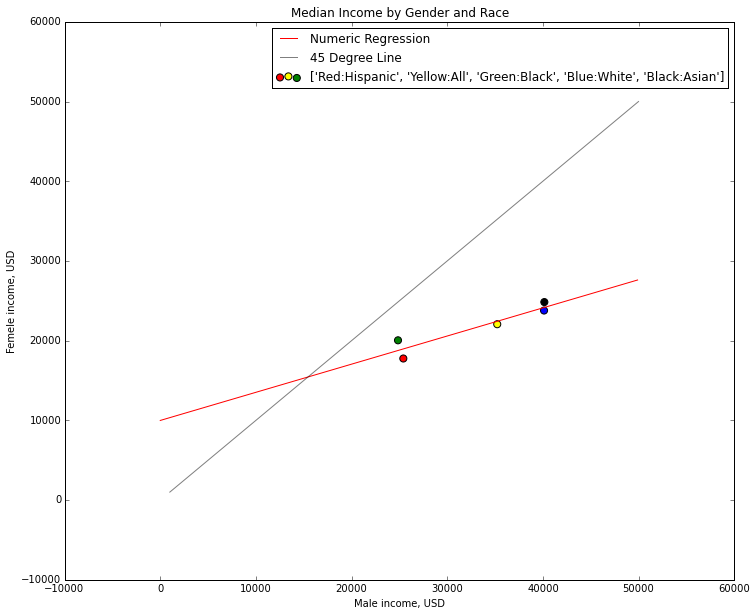

In [42]:
#plotted the results with 45 degree line and numeric regression line
fig = pl.figure(figsize=(12,10))
labels  = (['Red:' 'Hispanic', 'Yellow:' 'All', 'Green:' 'Black', 'Blue:' 'White', 'Black:' 'Asian'])
y  = ['red','yellow','green','blue','black']
pl.scatter(MMI, WMI, s=50, c=y, label=labels)
pl.title('Median Income by Gender and Race')
pl.xlabel('Male income, USD')
pl.ylabel('Femele income, USD')
line = np.arange(0, 50000, 100)
form = 0.3531*line + 9989.8444
pl.plot(line, form, 'red', label="Numeric Regression")
plot([1000,50000], [1000,50000], color='black', alpha=.5, label="45 Degree Line")
pl.legend()

In [11]:
#calculating the spearman correlation coefficient
cor = stats.spearmanr(MMI, WMI)


In [12]:
#getting the standard deviation and mean from the samples
MSD = std(MMI)
WSD = std(WMI)
MEAN_males = mean(MMI)
MEAN_woman = mean(WMI)

In [13]:
#calculating beta0 and beta1 for the sample
beta1=cor[0]*WSD/MSD
beta0=MEAN_woman-beta1*MEAN_males

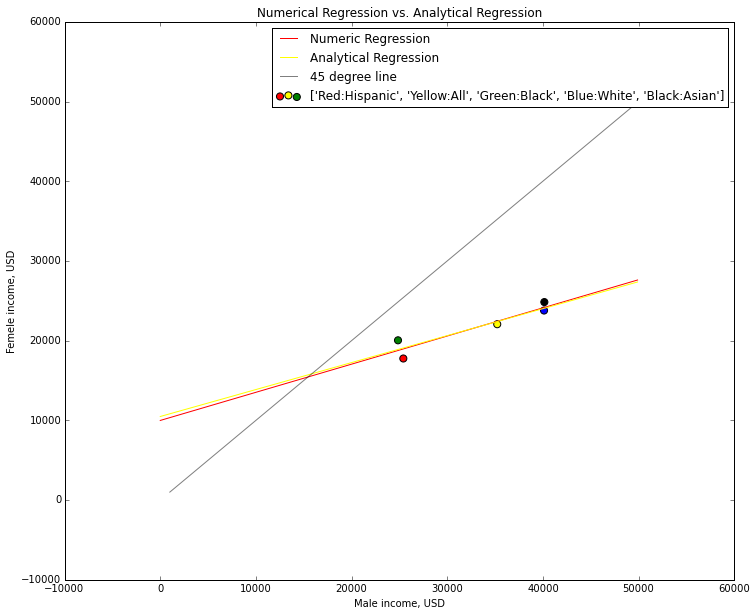

In [45]:
#ploting the results of the analytic regression vs the numeric regression
pl.figure(figsize=(12,10))
labels  = (['Red:' 'Hispanic', 'Yellow:' 'All', 'Green:' 'Black', 'Blue:' 'White', 'Black:' 'Asian'])
y  = ['red','yellow','green','blue','black']
pl.scatter(MMI, WMI, s=50, c=y, label=labels)
pl.title('Numerical Regression vs. Analytical Regression')
pl.xlabel('Male income, USD')
pl.ylabel('Femele income, USD')

line = np.arange(0, 50000, 100)
form2 = beta1*line + beta0
form = 0.3531*line + 9989.8444
pl.plot(line, form, 'red', label="Numeric Regression")
pl.plot(line, form2, 'yellow', label="Analytical Regression")
plot([1000,50000], [1000,50000], color='black', alpha=.5, label="45 degree line")
pl.legend()

The plot shows that the difference between the two regression calculations is not very big, but they are different. 

In [19]:
#grouping all the median income from all sources into one variable for men and women
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())


In [20]:
#masking the arrays
allmask = [np.isnan(all_males) + np.isnan(all_females)]


In [21]:
#masking the arrays
all_females.mask = allmask
all_males.mask = allmask

In [22]:
#just examing the data, find the length and below plotting it
len(all_males.mask), len(all_females.mask)

(245, 245)

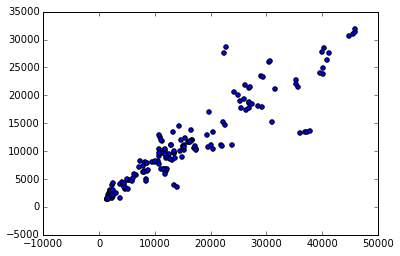

In [29]:
pl.scatter(all_males, all_females)

In [21]:
#performing a linear regression with all sources of median income
X = sm.add_constant((all_males))
model3 = sm.OLS((all_females), X, missing='drop')
results = model3.fit()


In [23]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sat, 17 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        15:50:45   Log-Likelihood:                -1668.8
No. Observations:                 178   AIC:                             3342.
Df Residuals:                     176   BIC:                             3348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1493.0394    351.359      4.249      0.0

NameError: name 'label' is not defined

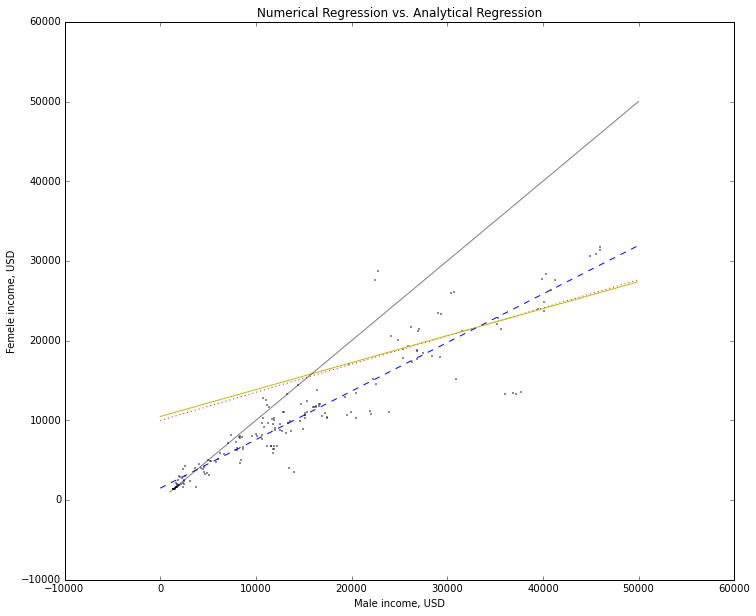

In [46]:
#plotting a lines of best fit with plots of total median income and then total median income from
#all sources.
pl.figure(figsize=(12,10))
#labels  = (['Red:' 'Hispanic', 'Yellow:' 'All', 'Green:' 'Black', 'Blue:' 'White', 'Black:' 'Asian'])
y  = ['red','yellow','green','blue','black']
pl.title('Numerical Regression vs. Analytical Regression')
pl.xlabel('Male income, USD')
pl.ylabel('Femele income, USD')

line = np.arange(0, 50000, 100)
form2 = beta1*line + beta0
form = 0.3531*line + 9989.8444
pl.plot(line, form, 'r:', label="Numeric Regression")
pl.plot(line, form2, 'y', label="Analytical Regression")
form3 = 0.6090*line + 1493.0394
pl.plot(line, form3, 'b--', label="Final Regression")
pl.scatter(all_males, all_females,s=1, alpha=0.5)
plot([1000,50000], [1000,50000], color='black', alpha=.5, label="45 Degree Angle")
pl.scatter(MMI, WMI, s=50, c=y,  label=label)

pl.legend()

In [34]:
#The annual mean salary of Lawyers in the United States is $133,470 
# if we apply the model...

projected_female_lawyer_salary = 0.6090*133470 + 1493.0394

In [35]:
print projected_female_lawyer_salary

82776.2694


Based on the model if we try to determine the expected salary for a female, you can see in the above example that if a man earns $133,470 as a lawyer, a female might only earn $82,776 (these figures are based on the bureau of labor statistics). There is clearly a differenc between what men earn and what women earn The plots show that generally the median incomes for men fall below the regression line, illustrating that the pay is not equal. Furthermore, you can see differences between races as well. White and Asian men earning more than Black and/or Hispanic men. 